[Reference](https://medium.com/analytics-vidhya/time-series-modelling-d6531c9a6338)

# 1. Random Walk

![random walk](https://miro.medium.com/max/1064/1*ve-6qAtIMJdpv_aHYHIrAw.png)

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Draw samples from a standard Normal distribution (mean=0, stdev=1).
points = np.random.standard_normal(1000)

# making starting point as 0
points[0]=0

# Return the cumulative sum of the elements along a given axis.
random_walk = np.cumsum(points)
random_walk_series = pd.Series(random_walk)

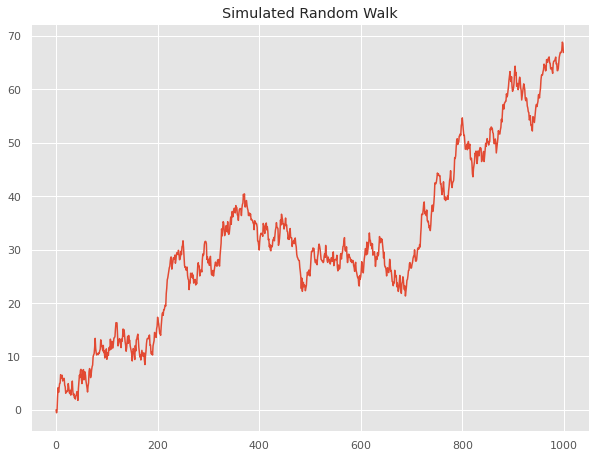

In [3]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk)
plt.title("Simulated Random Walk")
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


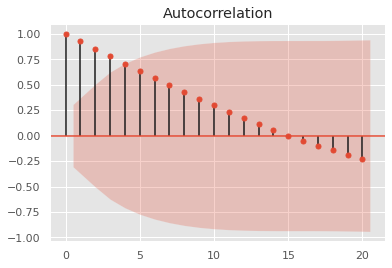

In [4]:
random_walk_acf = acf(random_walk)
acf_plot = plot_acf(random_walk_acf, lags=20)

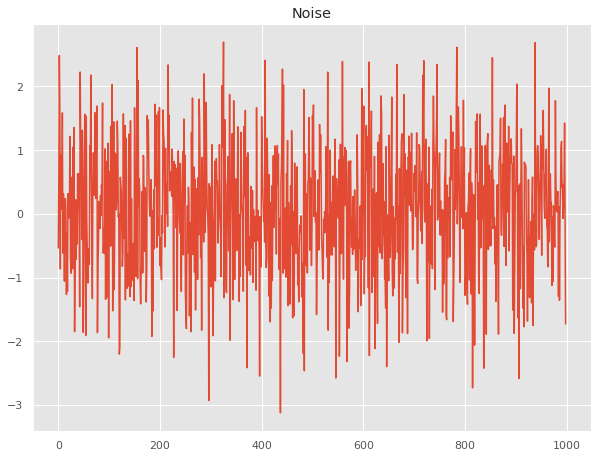

In [5]:
random_walk_difference = np.diff(random_walk, n=1)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk_difference)
plt.title('Noise')
plt.show()

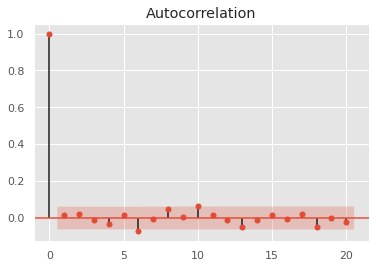

In [6]:
cof_plot_difference = plot_acf(random_walk_difference, lags=20);

# 2. Moving Averages Model (MA Model)

![MA](https://miro.medium.com/max/1400/1*tpwshRuOc43HY4TepwCR9g.png)

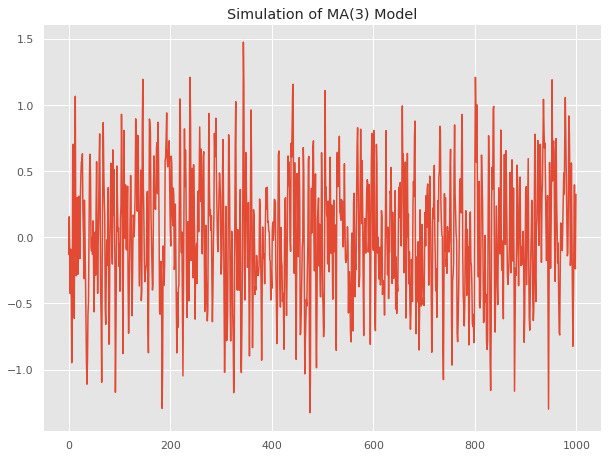

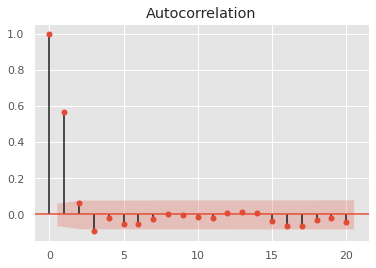

In [8]:
from statsmodels.tsa.arima_process import ArmaProcess

# start by specifying the lag
ar3 = np.array([3])

# specify the weights : [1, 0.9, 0.3, -0.2]
ma3 = np.array([1, 0.9, 0.3, -0.2])

# simulate the process and generate 1000 data points
MA_3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=1000)
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(MA_3_process)
plt.title('Simulation of MA(3) Model')
plt.show()
plot_acf(MA_3_process, lags=20);

# 3. Autoregression Model (AR Model)

![AR](https://miro.medium.com/max/1400/1*ztI8wVZxCOO5LNpZ7Z-_tQ.png)

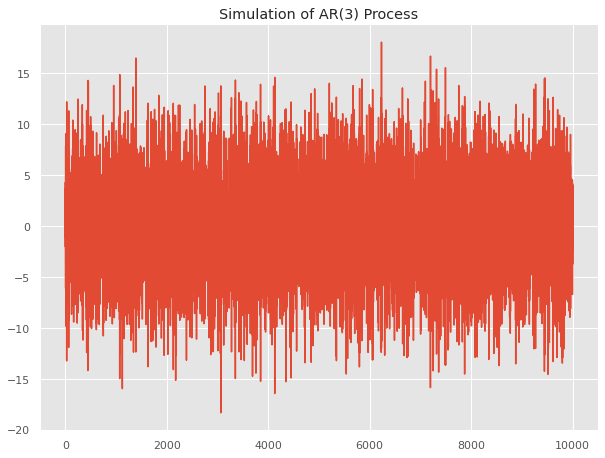

In [10]:
ar3 = np.array([1, 0.9, 0.3, -0.2])
ma = np.array([3])
simulated_ar3_points = ArmaProcess(ar3, ma).generate_sample(nsample=10000)
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_ar3_points)
plt.title("Simulation of AR(3) Process")
plt.show()

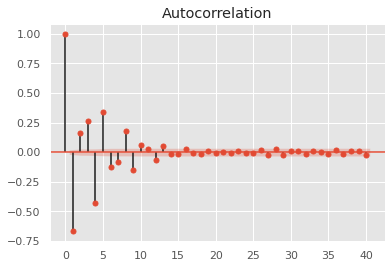

In [11]:
plot_acf(simulated_ar3_points);

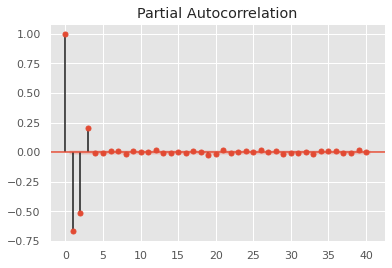

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(simulated_ar3_points);

In [13]:
from statsmodels.tsa.stattools import pacf

pacf_coef_AR3 = pacf(simulated_ar3_points)
print(pacf_coef_AR3)

[ 1.00000000e+00 -6.69908345e-01 -5.14588174e-01  2.04270039e-01
 -6.96398789e-03 -8.35283767e-03  5.91459931e-03  7.76253340e-03
 -1.30474466e-02  6.96293486e-03  5.72585165e-04  5.73952636e-04
  1.80365381e-02 -4.10109105e-03 -3.49314408e-03  8.80813245e-04
 -1.02026898e-02  7.70257644e-03  2.02896881e-03 -2.04325527e-02
 -1.72028812e-02  2.05523692e-02 -3.72416775e-03 -2.82268151e-04
  1.25627379e-02  3.45378145e-03  1.52278654e-02 -2.91338336e-03
  1.09039288e-02 -1.94191084e-02 -7.99094117e-03 -3.98525099e-03
  3.35773290e-03 -1.36564745e-02  9.76983619e-03  5.43062716e-03
  1.23985981e-02 -7.35586957e-03 -4.20445831e-03  1.54643929e-02
  2.86081151e-03]


# 4. Autoregressive Moving Averages Model (ARMA Model)

![ARMA](https://miro.medium.com/max/1400/1*ztI8wVZxCOO5LNpZ7Z-_tQ.png)

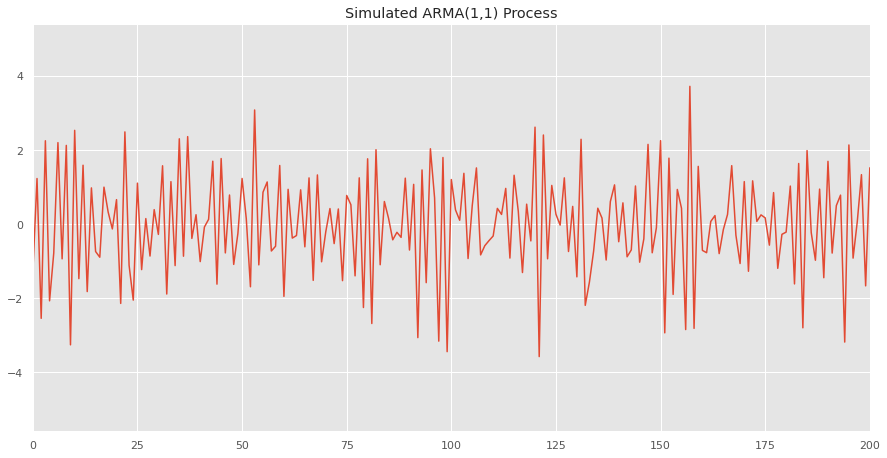

In [14]:
ar1 = np.array([1, 0.6])
ma1 = np.array([1, -0.2])
simulated_ARMA_1_1_points = ArmaProcess(ar1, ma1).generate_sample(nsample=10000)
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(simulated_ARMA_1_1_points)
plt.title("Simulated ARMA(1,1) Process")
plt.xlim([0, 200])
plt.show()

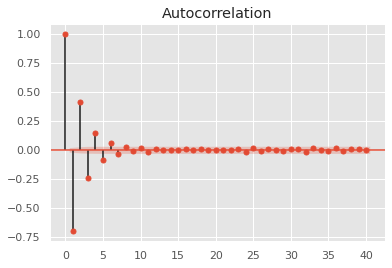

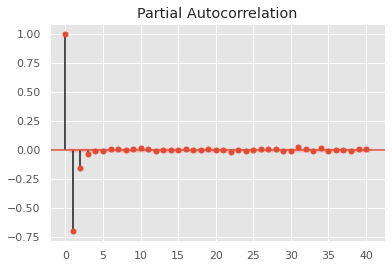

In [15]:
plot_acf(simulated_ARMA_1_1_points);
plot_pacf(simulated_ARMA_1_1_points);

# 5. Autoregressive Integrated Moving Averages (ARIMA Model)

![ARIMA](https://miro.medium.com/max/1400/1*GiVoIElKAbAZZnp-W-6lqA.png)

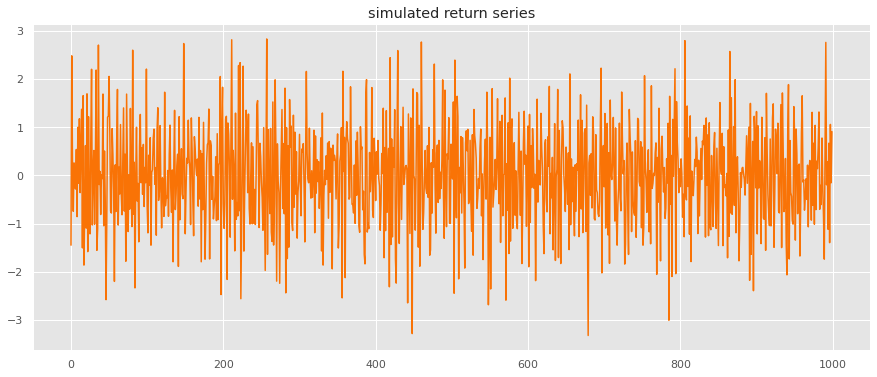

In [18]:
np.random.seed(200)

ar_params = np.array([1, -0.4])
ma_params = np.array([1, -0.8])

returns = ArmaProcess(ar_params, ma_params).generate_sample(nsample=1000)

returns = pd.Series(returns)
drift = 100

price = pd.Series(np.cumsum(returns)) + drift

returns.plot(figsize=(15,6), color=sns.xkcd_rgb["orange"], title="simulated return series")
plt.show()

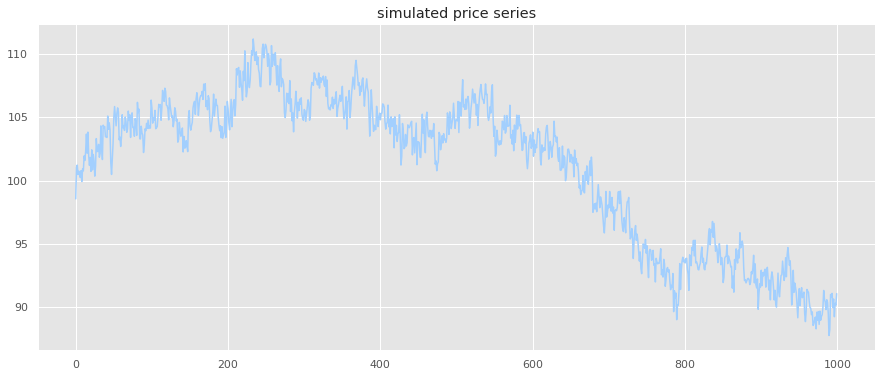

In [19]:
price.plot(figsize=(15,6), color=sns.xkcd_rgb["baby blue"], title="simulated price series")
plt.show()

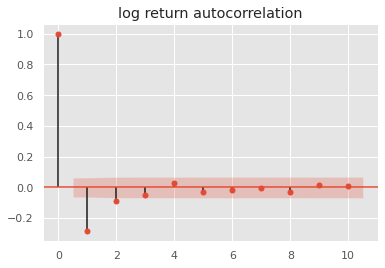

In [20]:
log_return = np.log(price) - np.log(price.shift(1))
log_return = log_return[1:]
_ = plot_acf(log_return,lags=10, title='log return autocorrelation')

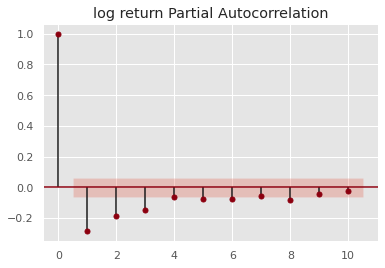

In [21]:
_ = plot_pacf(log_return, lags=10, title='log return Partial Autocorrelation', color=sns.xkcd_rgb["crimson"])

fitted AR parameter 0.38, MA parameter -0.78


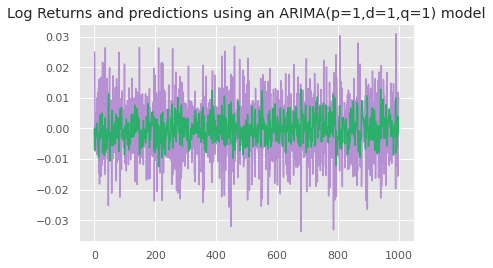

In [23]:
from statsmodels.tsa.arima_model import ARIMA

def fit_arima(log_returns):
        ar_lag_p = 1
        ma_lag_q = 1
        degree_of_differentiation_d = 0

        # create tuple : (p, d, q)
        order = (ar_lag_p, degree_of_differentiation_d, ma_lag_q)

        # create an ARIMA model object, passing in the values of the lret pandas series,
        # and the tuple containing the (p,d,q) order arguments
        arima_model = ARIMA(log_returns.values, order=order)
        arima_result = arima_model.fit()

        #TODO: from the result of calling ARIMA.fit(),
        # save and return the fitted values, autoregression parameters, and moving average parameters
        fittedvalues = arima_result.fittedvalues
        arparams = arima_result.arparams
        maparams = arima_result.maparams

        return fittedvalues,arparams,maparams
        
fittedvalues,arparams,maparams = fit_arima(log_return)
arima_pred = pd.Series(fittedvalues)
plt.plot(log_return, color=sns.xkcd_rgb["pale purple"])
plt.plot(arima_pred, color=sns.xkcd_rgb["jade green"])
plt.title('Log Returns and predictions using an ARIMA(p=1,d=1,q=1) model');
print(f"fitted AR parameter {arparams[0]:.2f}, MA parameter {maparams[0]:.2f}")